In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="darkgrid")

# Morant Consultores - Evaluación Inicial


---

> Resuelto por: *Arturo Bravo Reynaga*

# Problema 3


Utilice la base de datos data/municipios_rezago.csv. Contiene una lista de municipios también ficticia que tiene las siguientes variables: población, población de 15 años o más analfabeta, población de 6 a 14 años que no asiste a la escuela, población sin derechohabiencia a servicios de salud y viviendas con piso de tierra. Todas estas son variables que expresan un tipo de rezago. Imagine que su cliente es el Gobierno Federal y quiere hacer un programa social que atienda el rezago, en general. Le pide elaborar un ranking con el propósito de saber a qué municipios dar mayor prioridad. Agregue una variable a la base de datos que exprese el orden de prioridad en donde 1 es el municipio más rezagado y nrow(bd) es el municipio menos rezagado. Para ello debe utilizar un criterio de rezago, justifica qué criterio utilizarías. Puedes utilizar combinaciones lineales de las variables o técnicas de reducción de dimensionalidad como análisis de componentes principales.

Nos inspiraremos en el [artículo escrito por Gustavo Santos](https://towardsdatascience.com/creating-scores-and-rankings-with-pca-c2c3081fdb26), donde genera un ranking en R utilizando análisis de componentes principales.

In [2]:
url = 'https://raw.githubusercontent.com/morant-consultores/evaluacion_inicial/main/data/municipios_rezago.csv'
df3 = pd.read_csv(url)

In [3]:
df3.head()

,Municipio,pob_total,15_analfabeta,6_14_sinescuela,poblacion_sinsalud,viv_pisotierra
0,Berriozábal,863893,1.427718,4.490033,17.918423,0.446572
1,Mapastepec,41,6.451613,0.000000,14.634146,0.000000
2,Altamirano,1169,7.076566,7.960199,14.884517,1.067616
3,Tonalá,41,10.344828,14.285714,75.609756,0.000000
4,Jiquipilas,1054,6.420765,9.844560,14.041746,1.181102


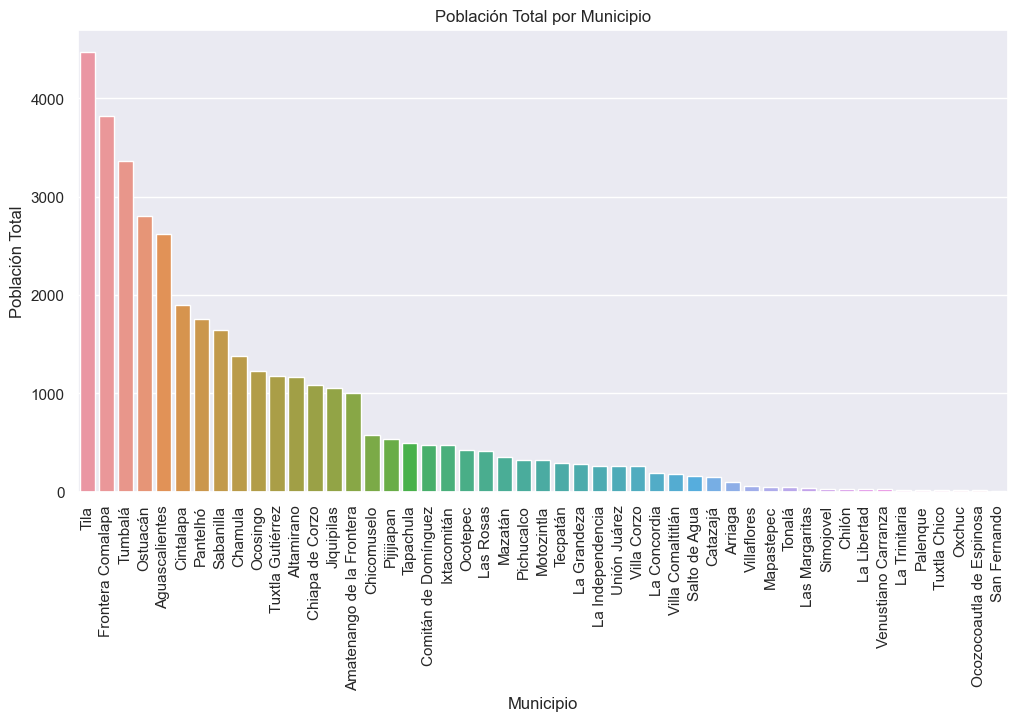

In [4]:
# Ordenar los datos de mayor a menor y eliminar el primer registro
df3_sorted_pob = df3.sort_values(by='pob_total', ascending=False).iloc[1:]

plt.figure(figsize=(12, 6))
sns.barplot(x='Municipio', y='pob_total', data=df3_sorted_pob)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

plt.xlabel('Municipio')
plt.ylabel('Población Total')
plt.title('Población Total por Municipio')

plt.show()

In [5]:
count_less_1000 = (df3_sorted_pob['pob_total'] < 1000).sum()
print(f"Municios con una población menor a 1000 habitantes: {count_less_1000} de un total de {df3.shape[0]}")

Municios con una población menor a 1000 habitantes: 35 de un total de 50


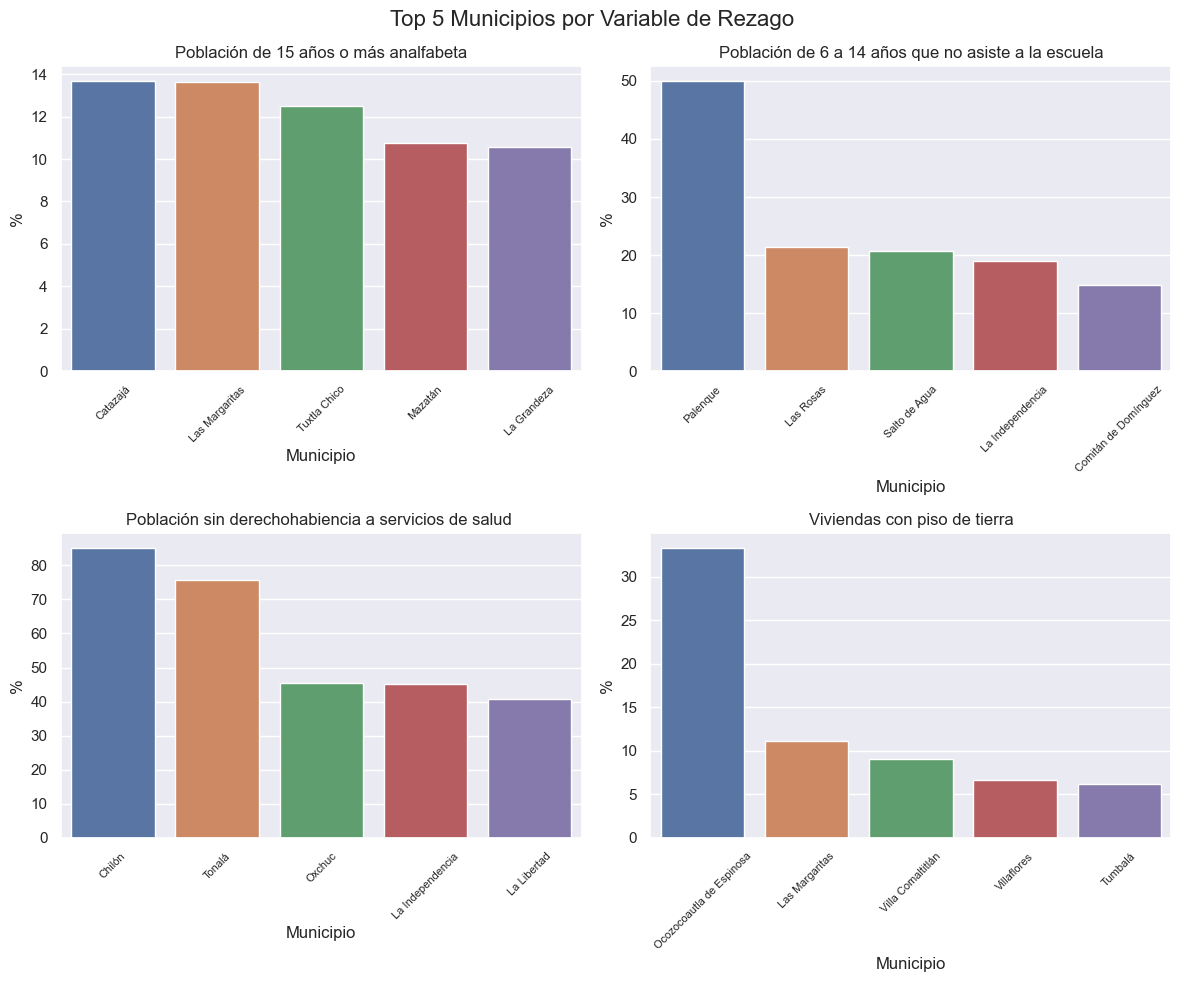

In [6]:
# Obtenemos los 5 municipios con los mayores valores en cada variable
# de rezago
top_analfabeta = df3.nlargest(5, '15_analfabeta')
top_sinescuela = df3.nlargest(5, '6_14_sinescuela')
top_sinsalud = df3.nlargest(5, 'poblacion_sinsalud')
top_pisotierra = df3.nlargest(5, 'viv_pisotierra')

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Top 5 Municipios por Variable de Rezago', fontsize=16)

# Gráfico 1: 15_analfabeta
sns.barplot(ax=axes[0, 0], x='Municipio',
            y='15_analfabeta', data=top_analfabeta)
axes[0, 0].set_title('Población de 15 años o más analfabeta')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(),
                           rotation=45, fontsize=8)
axes[0, 0].set_ylabel('%')

# Gráfico 2: 6_14_sinescuela
sns.barplot(ax=axes[0, 1], x='Municipio',
            y='6_14_sinescuela', data=top_sinescuela)
axes[0, 1].set_title('Población de 6 a 14 años que no asiste a la escuela')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(),
                           rotation=45, fontsize=8)
axes[0, 1].set_ylabel('%')

# Gráfico 3: poblacion_sinsalud
sns.barplot(ax=axes[1, 0], x='Municipio',
            y='poblacion_sinsalud', data=top_sinsalud)
axes[1, 0].set_title('Población sin derechohabiencia a servicios de salud ')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(),
                           rotation=45, fontsize=8)
axes[1, 0].set_ylabel('%')

# Gráfico 4: viv_pisotierra
sns.barplot(ax=axes[1, 1], x='Municipio',
            y='viv_pisotierra', data=top_pisotierra)
axes[1, 1].set_title('Viviendas con piso de tierra')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(),
                           rotation=45, fontsize=8)
axes[1, 1].set_ylabel('%')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

### Test de Bartlett

[El test de Bartlett ](https://www.tutorialspoint.com/how-to-perform-bartlett-s-test-in-python)se utiliza en este caso para evaluar si las correlaciones entre las variables "15_analfabeta", "6_14_sinescuela", "poblacion_sinsalud" y "viv_pisotierra" son estadísticamente diferentes de cero. El objetivo es determinar si las variables tenían varianzas significativamente diferentes entre sí.


In [7]:
test_statistic, p_value = stats.bartlett(
    df3["15_analfabeta"],
     df3["6_14_sinescuela"],
     df3["poblacion_sinsalud"],
     df3["viv_pisotierra"])

print("Estadístico de prueba:", test_statistic)
print("p-value:", p_value)

if p_value > 0.05:
   print("Las varianzas no son significativamente diferentes.")
else:
   print("Las varianzas son significativamente diferentes.")

Estadístico de prueba: 113.98768650019072
p-value: 1.5206123129455142e-24
Las varianzas son significativamente diferentes.


En este caso, el valor p obtenido del test de Bartlett fue de 1.5206123129455142e-24, lo que indica que es extremadamente pequeño. Dado que el valor p es menor que 0.05, rechazamos la hipótesis nula (Ho) de que las correlaciones son estadísticamente iguales a cero. Por lo tanto, podemos concluir que las varianzas entre las variables son significativamente diferentes.

Este resultado sugiere que las variables seleccionadas tienen diferentes niveles de variabilidad y, por lo tanto, aportan información única al análisis. Esto respalda la decisión de utilizar estas variables en el análisis de componentes principales (PCA).

### Matriz de correlaciones

La realización de la matriz de correlaciones tiene como objetivo principal analizar las relaciones lineales entre las variables.

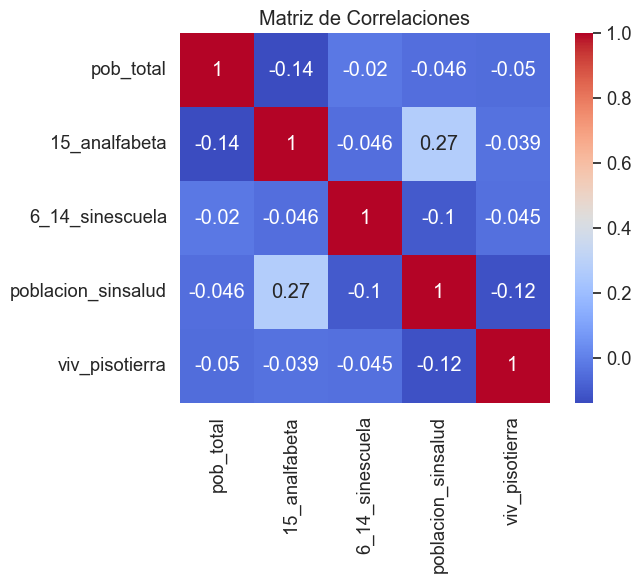

In [8]:
variables = ['pob_total','15_analfabeta', '6_14_sinescuela','poblacion_sinsalud', 'viv_pisotierra']
data_selected = df3[variables]
correlation_matrix = data_selected.corr()

sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlaciones')
plt.show()

Se observa que no hay una correlación fuerte entre variables.

### PCA

Hacemos el análisis de componentes principales como una [técnica para generar un ranking](https://www.journalijar.com/uploads/864_IJAR-17816.pdf) y observamos que se acumula el 85% de la varianza en los primeros 4 componentes.

In [9]:
# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Aplicar PCA
pca = PCA()
components = pca.fit_transform(data_scaled)

# Eigenvalores de cada componente principal
eigenvalues = pca.explained_variance_

# Porcentaje de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = explained_variance_ratio.cumsum()

summary_data = {
    'Componente': [f'Componente {i+1}' for i in range(len(eigenvalues))],
    'Eigenvalor': eigenvalues,
    'Varianza Explicada': explained_variance_ratio,
    'Varianza Acumulada': cumulative_variance
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

     Componente  Eigenvalor  Varianza Explicada  Varianza Acumulada
0  Componente 1    1.392172            0.272866            0.272866
1  Componente 2    1.094629            0.214547            0.487413
2  Componente 3    1.051924            0.206177            0.693590
3  Componente 4    0.848819            0.166369            0.859959
4  Componente 5    0.714497            0.140041            1.000000


En PCA, los [loadings](https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html) representan el aporte de las variables originales a cada componente principal. Cada componente principal es una combinación lineal de las variables originales, y los loadings indican la magnitud y la dirección de la contribución de cada variable a ese componente.

In [10]:
# Obtener los loadings de cada variable por cada componente principal
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'Component_{i+1}'for i in range(pca.n_components_)],
    index=variables)

print('Loadings:')
print(loadings)

Loadings:
                    Component_1  Component_2  Component_3  Component_4  \
pob_total             -0.283628    -0.619814    -0.424134     0.576622   
15_analfabeta          0.639370     0.134909     0.107502     0.366710   
6_14_sinescuela       -0.217418    -0.105976     0.848829     0.444068   
poblacion_sinsalud     0.645029    -0.191673    -0.101127     0.220657   
viv_pisotierra        -0.217780     0.741391    -0.278955     0.535858   

                    Component_5  
pob_total             -0.151667  
15_analfabeta         -0.653431  
6_14_sinescuela        0.154243  
poblacion_sinsalud     0.698773  
viv_pisotierra         0.194810  


Los loadings al cuadrado representan la varianza explicada por cada variable en cada componente principal. Además notemos que loadings(PC1) al cuadrado es muy parecido a loadings(PC5) al cuadrado lo que da más fuerza a nuestra decisión de seleccionar las primeras 4 componentes principales.

In [11]:
loadings_squared = loadings ** 2
print(loadings_squared)

                    Component_1  Component_2  Component_3  Component_4  \
pob_total              0.080445     0.384169     0.179889     0.332493   
15_analfabeta          0.408795     0.018201     0.011557     0.134476   
6_14_sinescuela        0.047270     0.011231     0.720511     0.197196   
poblacion_sinsalud     0.416062     0.036739     0.010227     0.048689   
viv_pisotierra         0.047428     0.549660     0.077816     0.287144   

                    Component_5  
pob_total              0.023003  
15_analfabeta          0.426972  
6_14_sinescuela        0.023791  
poblacion_sinsalud     0.488283  
viv_pisotierra         0.037951  


In [12]:
# Obtenemos los loadings al cuadrado de los primeros 4 componentes principales
loadings_squared_selected = loadings_squared.iloc[:, :4]

# Realizamos la transformación lineal de data_scaled
transformed_data = np.matmul(data_scaled, loadings_squared_selected.values)

df3["score"] = np.sum(transformed_data, axis=1)

# Generamos el ranking acorde al score calculado
df3["ranking"] = df3["score"].rank(ascending=False)
df3 = df3.sort_values(by="ranking")

df3.head(50)

,Municipio,pob_total,15_analfabeta,6_14_sinescuela,poblacion_sinsalud,viv_pisotierra,score,ranking
0,Berriozábal,863893,1.427718,4.490033,17.918423,0.446572,5.651045,1.0
13,Ocozocoautla de Espinosa,11,0.000000,0.000000,9.090909,33.333333,3.889606,2.0
36,Palenque,14,0.000000,50.000000,0.000000,0.000000,3.045693,3.0
3,Tonalá,41,10.344828,14.285714,75.609756,0.000000,3.020849,4.0
23,Las Margaritas,37,13.636364,0.000000,24.324324,11.111111,2.315897,5.0
41,La Independencia,264,6.565657,18.918919,45.075758,1.449275,2.236302,6.0
37,Salto de Agua,157,5.172414,20.689655,13.375796,4.878049,1.832740,7.0
38,Las Rosas,411,6.081081,21.333333,15.085158,2.941176,1.740545,8.0
47,Tumbalá,3362,5.538187,13.273002,26.710291,6.159895,1.737966,9.0
18,Comitán de Domínguez,468,2.601156,14.864865,21.581197,4.918033,1.030239,10.0



## Observaciones
*   Dado el ranking observado podemos notar que el municipio Berriozábal, aun con no tener los porcentajes más altos de rezago, queda en primer lugar, esto tiene sentido considerando que su población es mucho mayor que cualquier otro municipio. Esto se debe a que en números absolutos, Berriozábal es el municipio con mayor rezago.
*   Notamos además que, de manera correcta, el modelo considera en los últimos lugares a los municipios que no tienen variables de rezago y los acomoda por población.

